Ceren Yılmaz Gülten 2080637 Exercise 10.

In [1]:
import pandas as pd
import numpy as np 
import math 

In [2]:
#1. Hurricanes per Year
from scipy.stats import poisson


from scipy import stats
# historical average is mean so 6.3 is the mean value. 

mu = 6.3 
x0 = 15 

# for standart derivation, since we assume that the hurricanes are random with poisson distribution, we can use poisson dist. 
sigma_mu = poisson.std(mu,loc=0)
# Z-test calculation formula 

Z = abs(x0 - mu) / sigma_mu
print("Z =", Z)

if Z >= 3:
    print("The Z value is bigger than the 3 value, the hypothesis is correct.")
else:
    print("The Z value is smaller than the 3 value, the hypothesis is false.")

pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)

Z = 3.4661629670697414
The Z value is bigger than the 3 value, the hypothesis is correct.
p-value = 0.0005279431738299246


In [3]:
# 2. Pairwise t-test

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

pre_std = np.std(pre,ddof=1)
post_std = np.std(post,ddof=1)
std = np.sqrt((pre_std**2 + post_std**2)/2)

mean_pre = np.mean(pre)
mean_post = np.mean(post)
t_test = (mean_pre-mean_post) / std*(np.sqrt(2/len(post)))

print(t_test)
n = len(pre)
pvalue = stats.t.cdf(t_test, n - 1) + (1. - stats.t.cdf(-t_test, n - 1))
print("p-value =", pvalue)
# since the p-value smaller than the level of significance, the null hypothesis will be rejected. 

-0.7573995876275257
p-value = 0.4681758060603869


'\nEspecially in the minimum degree curve, there is a little bit miss fitting. This can be because of \ndifferent parameters and since we use estimated parameters. \nBut, since the miss fitting ratio is really low, we can observed that these are compatible with the real \ndata values.  '

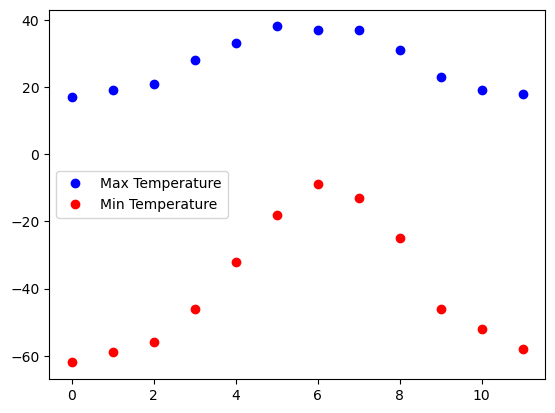

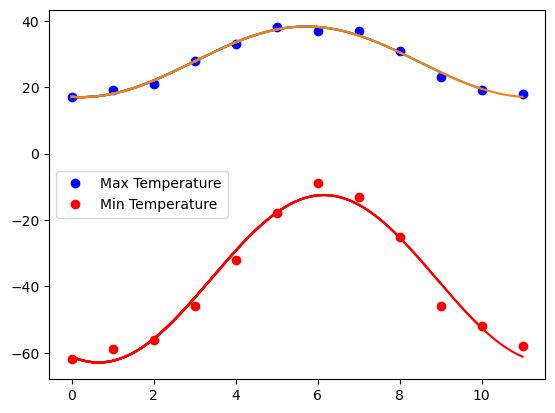

In [5]:
# 3. Curve fitting of temperature in Alaska
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

fig,ax = plt.subplots()
ax.plot(max, 'bo', label='Max Temperature')
ax.plot(min, 'o' ,color='red', label='Min Temperature')
ax.legend(loc='best') #location code 0 for best 
def func(time, avg, amplitude, time_off):
    return (avg + amplitude * np.cos((time + time_off) * 2 * np.pi / time.max()))
month = np.arange(12)
popt_max, pcov_max = curve_fit(func,month,max,[40,15,0])
popt_min, pcov_min = curve_fit(func,month,min,[-65,-5,0])
#  squared residuals of f(xdata, *popt) - ydata is minimized.
# pcov is The estimated covariance of popt.
# plot with 
day = np.linspace(0, month, 365)
fig,ax = plt.subplots()
ax.plot(max, 'bo', label='Max Temperature')
ax.plot(min, 'o' ,color='red', label='Min Temperature')
ax.legend(loc='best') #location code 0 for best 
ax.plot(day,func(day, *popt_max) , label='Max Temperature')
ax.plot(day,func(day, *popt_min),  color='red', label='Min Temperature')

'''
Especially in the minimum degree curve, there is a little bit miss fitting. This can be because of 
different parameters and since we use estimated parameters. 
But, since the miss fitting ratio is really low, we can observed that these are compatible with the real 
data values.  '''


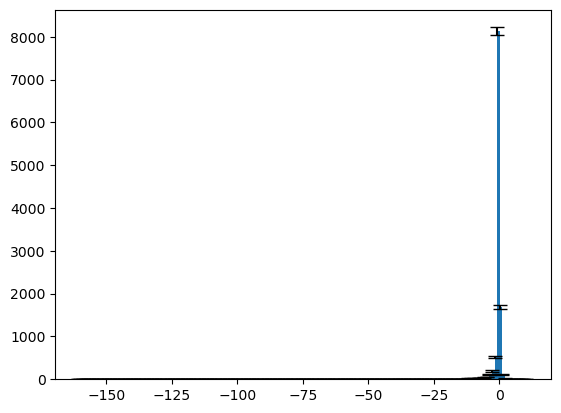

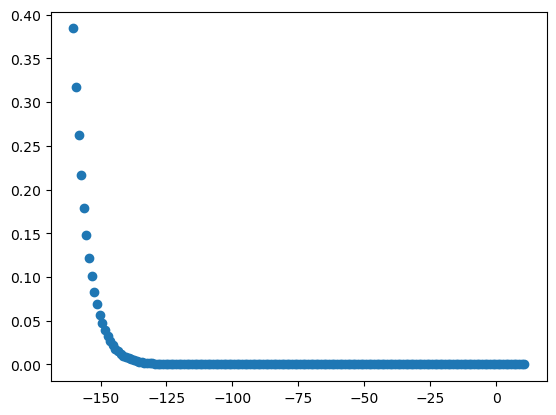

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
5033.163879393734

In [6]:
#4 Fit the residues
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare
data = pd.read_pickle('data/residuals_261.pkl').item()

residual = data['residuals']

n,bins,patches = plt.hist(residual, bins=np.arange(np.min(residual), np.max(residual))) 
# create histogram and get return values 
# to select proper bins size use arrange with max and min value
center = (bins[:-1] + bins[1:]) / 2 # to get center point of each bin get last and first point and divide 2

# Poisson for each bin 
poisson = np.sqrt(n)

# for error bar, use poisson dist
plt.errorbar(bins[:-1], n, yerr=poisson, fmt='none', ecolor='k', capsize=5)
plt.show()

# for the fit, use gaussian distributşon formula 
def gaussian(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)*2 / (2 * sigma*2))

params, covariance = curve_fit(gaussian, center, n, p0=[np.mean(residual), np.std(residual)]) # curve fit function for optimization 
fit = gaussian(center, *params) # call the gaussion function for the calculation 
plt.plot(center, fit, 'o', linewidth=2)
plt.show()
# goodness-of-fit test use chisquare
chi2, p = chisquare(n, fit, ddof = 0)
# Print the p-value of the fit
print(f"p-value: ",p)





Best fit values =  [-9.96203467 12.33174286  9.26282131]


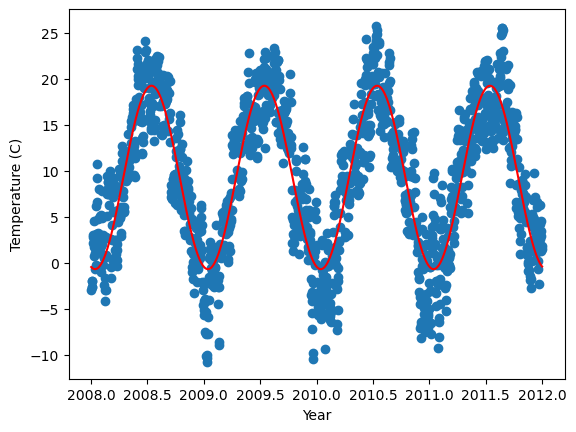

Average: 9.261252084167237
Max Temp: 19.224753431519183
Min Temp: -0.6990214731851534
RSS f function: 18669.515394578364
RSS g function: 18669.22543095606
There is no need for additional parameters.


In [22]:
# 5. Temperatures in Munich
from scipy.stats import f
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/
year, temp = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt', unpack=True)
keep = np.abs(temp) < 90
year = year[keep]
temp = temp[keep]

# f function in the question 
def func(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c
def gfunc(t, a, b, c, d):
    return a * np.cos(2 * np.pi * b * t + c) + d



#in the question it says 2008- 2012 so we need to mask the data
mask = (year >= 2008) & (year <= 2012)
year = year[mask]
temp = temp[mask]
popt, _ = curve_fit(func, year, temp) # fitting the curve 
poptg, _ = curve_fit(gfunc, year, temp) # fitting the curve for the g gunction 
print('Best fit values = ' , popt)
# plotting the fitting on the model 
plt.scatter(year, temp)
plt.plot(year, func(year, *popt), color='r')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.show()

avrge_temp = np.mean(temp)
maxt = np.max(func(year, *popt))
mint = np.min(func(year, *popt))
print("Average:", avrge_temp)
print("Max Temp:", maxt)
print("Min Temp:", mint)
# what is b value? It represent the phase shift of the cosine function. And cosine function is represent the the time of the year
# for the coolest and highest temperature
ftestrss_f = sum((temp - func(year, *popt))**2) # squared sum of the residuals of the fit (y_org - y_new)**2 sum
ftestrss_g = sum((temp - gfunc(year, *poptg))**2)
print('RSS f function:' ,ftestrss_f)
print('RSS g function:' ,ftestrss_g)

# F-test 
F_test = ((ftestrss_f - ftestrss_g) / (4-3)) / (ftestrss_g / (len(year) - 4))
# g function has the 4 parameter and f function has 3 parameters, 4-3 from there 
p = 1. - stats.f.cdf(F_test, 1, len(year) - 4)
if p <0.05: 
    print("The additional parameters needed. p-value: ", p)
else: 
    print("There is no need for additional parameters.")
